In [ ]:
#  ========================================================================================================
#  =                                       Loading Data and Packages                                      =
#  ========================================================================================================

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
%matplotlib inline


In [3]:
#  ========================================================================================================
#  =                                       Loading DataFrame                                              =
#  ========================================================================================================

In [140]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
df_t = pd.read_csv("train.csv")
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df.shape))

# Now drop the 'Id' column since it's unnecessary for the prediction process.
df.drop(['Id'], axis=1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 

The train data size after dropping Id feature is : (1460, 80) 


In [7]:
#  ========================================================================================================
#  =                              Analyzing the target variable "Sale Price"                              =
#  ========================================================================================================

In [80]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [81]:
# =======================         Checking the Columns          ======================= 

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [82]:
# =======================         Checking Categorial Data          ======================= 

df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
# =======================         Checking Numerical Data          ======================= 

df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [84]:
categorial = len(df.select_dtypes(include=['object']).columns)
numerical = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorial, 'categorical', '+',numerical, 'numerical', '=', categorial+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


In [85]:
# =======================         Correlation Matrix                  =======================

df_corr = df.corr()

Text(0.5, 1, 'Heatmap showing the Correlation between variables')

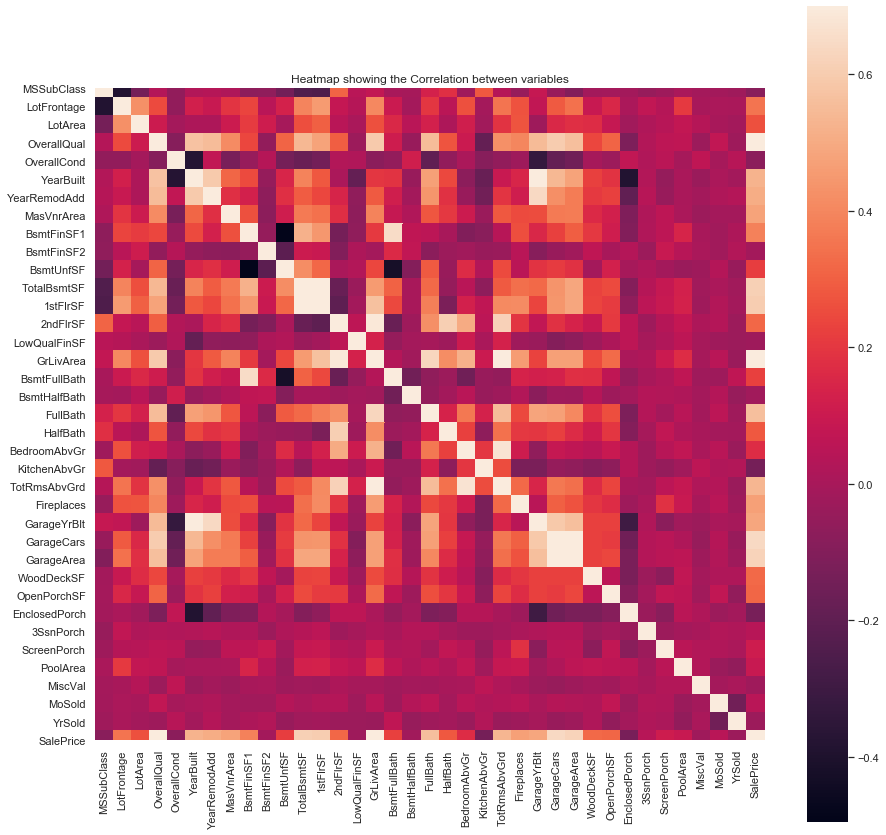

In [86]:
# =======================         Correlation Matrix Heatmap          ======================= 

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, vmax=.7, square=True);
ax.set_title('Heatmap showing the Correlation between variables')

In [139]:
df_temp = df_corr['SalePrice']
df_df = pd.DataFrame(df_temp)
df_df.sort_values(["SalePrice"], axis=0, ascending=False, inplace=True) 
df_df 

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


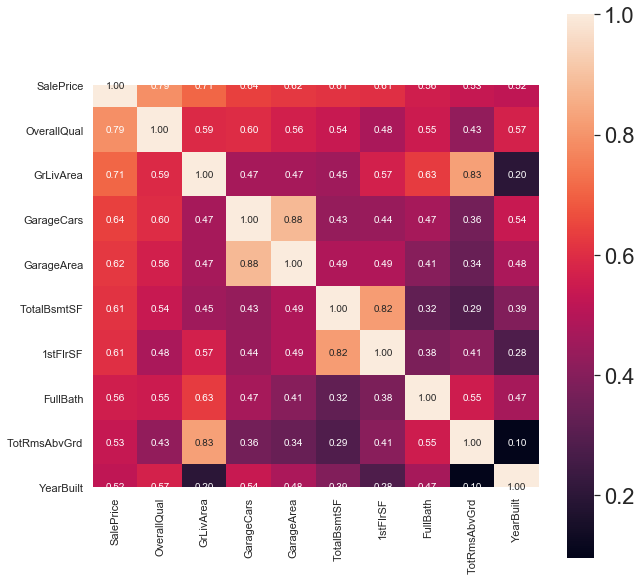

In [88]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = df_df.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [89]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


In [90]:
val = df.values
count = 0
for i in range(len(val)):
    for j in range(len(val[i])):
        if not val[i][j]:
            count += 1
print("Null Values =",count)

Null Values = 17364


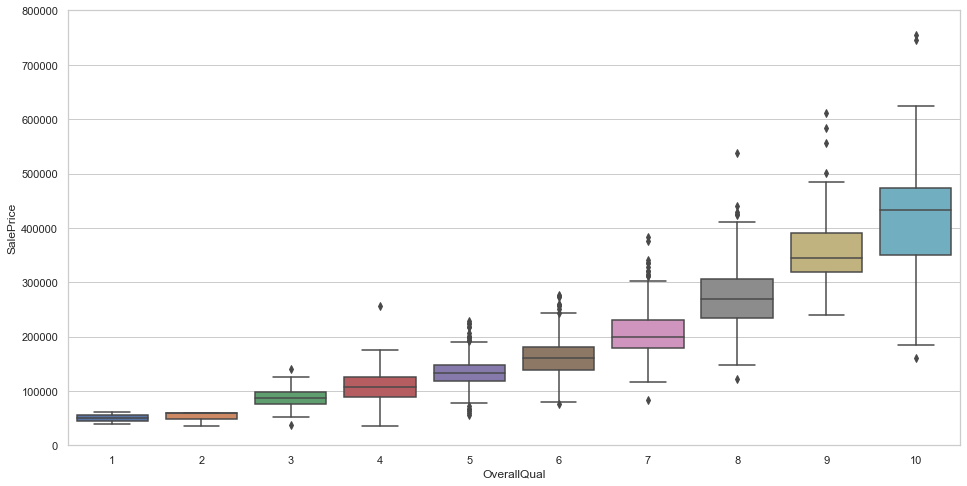

In [144]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [93]:
#df = df.drop(df[(df['SalePrice']>600000)].index).reset_index(drop=True)
               


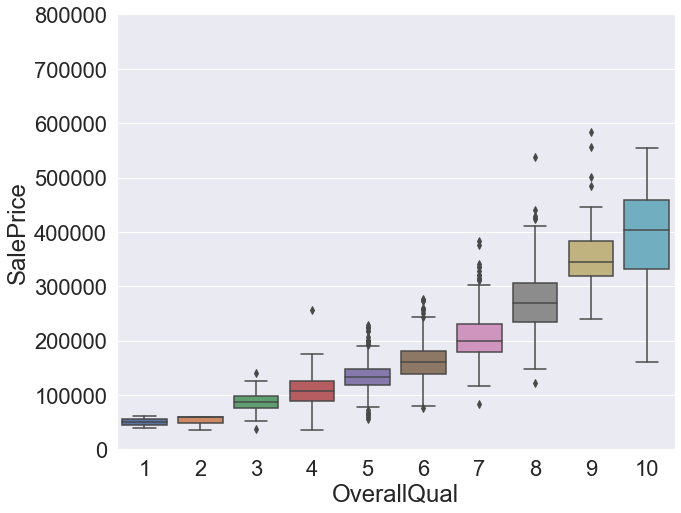

In [94]:
'''
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
'''

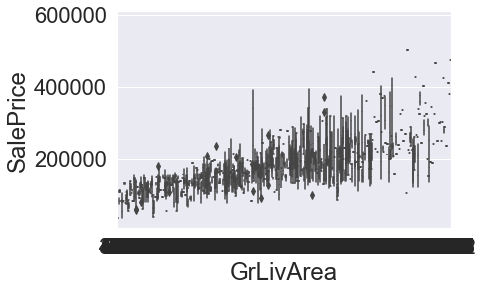

In [95]:
#  ========================================================================================================
#  =                                       Living Area vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GrLivArea'], y=df['SalePrice'])

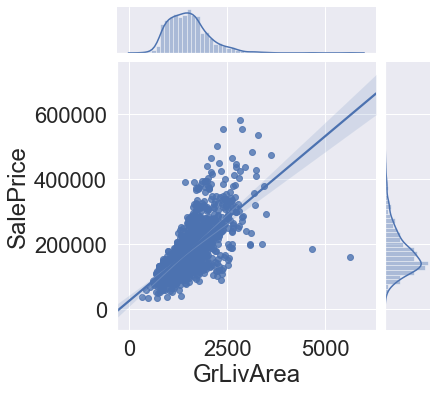

In [96]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')
#sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

In [97]:
#  ========================================================================================================
#  =                                            Removing Outliers                                         =
#  ========================================================================================================

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

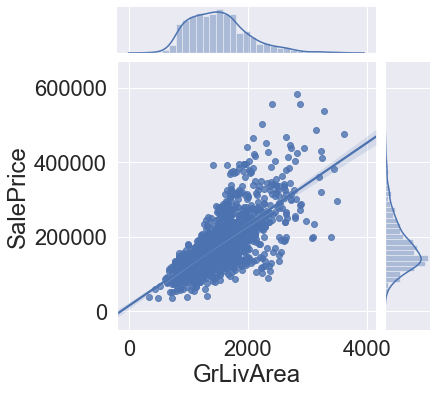

In [98]:
#  ========================================================================================================
#  =                       Living Area vs Sale Price after removing outliers                              =
#  ========================================================================================================
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

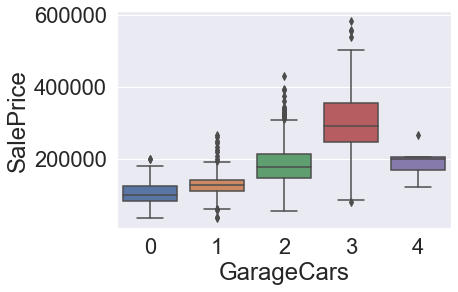

In [99]:
#  ========================================================================================================
#  =                                   Garage Capacity vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

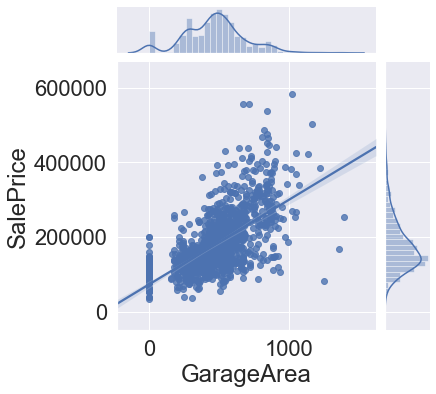

In [100]:
#  ========================================================================================================
#  =                                       Garage Area vs Sale Price                                      =
#  ========================================================================================================

sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

In [101]:
#  ========================================================================================================
#  =                                           Removing Outliers                                          =
#  ========================================================================================================

df = df.drop(df[(df['GarageArea']>1000) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

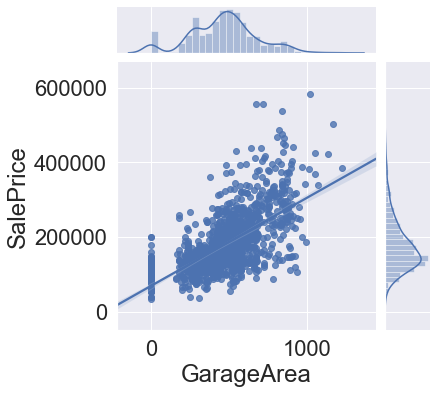

In [102]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

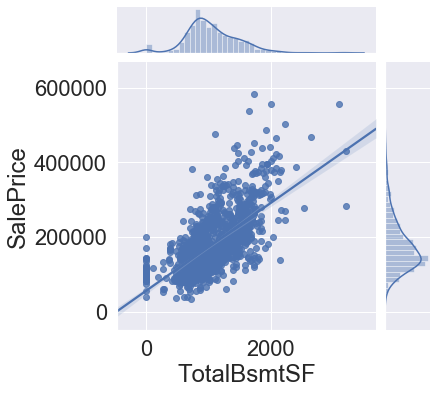

In [103]:
#  ========================================================================================================
#  =                                   Total Basement Area vs Sale Price                                  =
#  ========================================================================================================
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg')

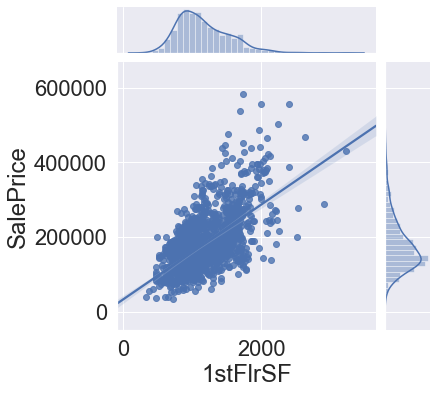

In [104]:
#  ========================================================================================================
#  =                                     First Floor Area vs Sale Price                                   =
#  ========================================================================================================
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

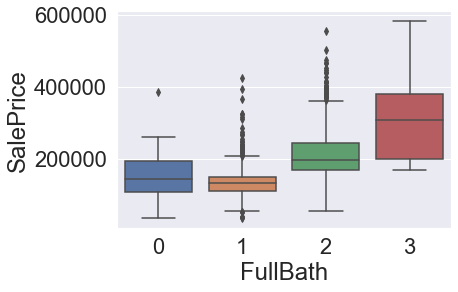

In [105]:
#  ========================================================================================================
#  =                                         Total Bath vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])

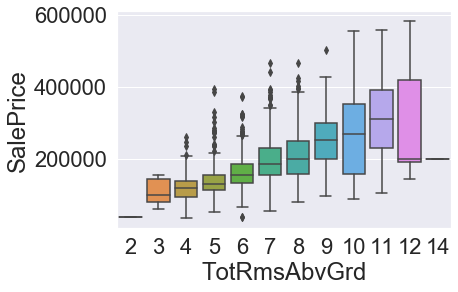

In [106]:
#  ========================================================================================================
#  =                                         Total Rooms vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

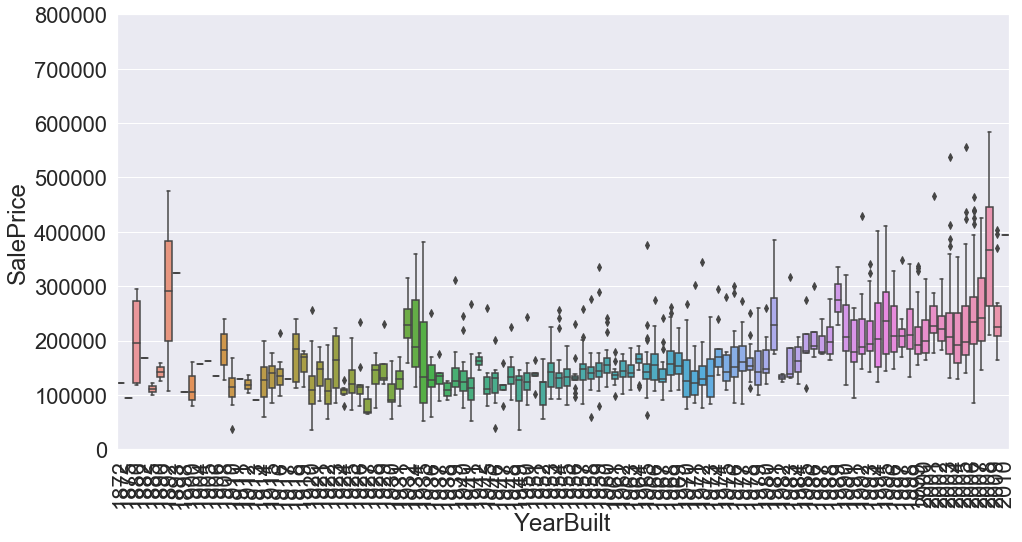

In [107]:
#  ========================================================================================================
#  =                                         Year Built vs Sale Price                                     =
#  ========================================================================================================
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [108]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    missing_data = df.isnull().sum()/len(df)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df)
missing_data




PoolQC          99.654696
MiscFeature     96.339779
Alley           93.715470
Fence           80.662983
FireplaceQu     47.582873
LotFrontage     17.817680
GarageYrBlt      5.593923
GarageType       5.593923
GarageFinish     5.593923
GarageQual       5.593923
GarageCond       5.593923
BsmtFinType2     2.624309
BsmtExposure     2.624309
BsmtFinType1     2.555249
BsmtCond         2.555249
BsmtQual         2.555249
MasVnrArea       0.552486
MasVnrType       0.552486
Electrical       0.069061
dtype: float64

In [109]:
missing_data = missing_data.to_frame()
missing_data.columns = ['count']
missing_data.index.names = ['Name']
missing_data['Name'] = missing_data.index

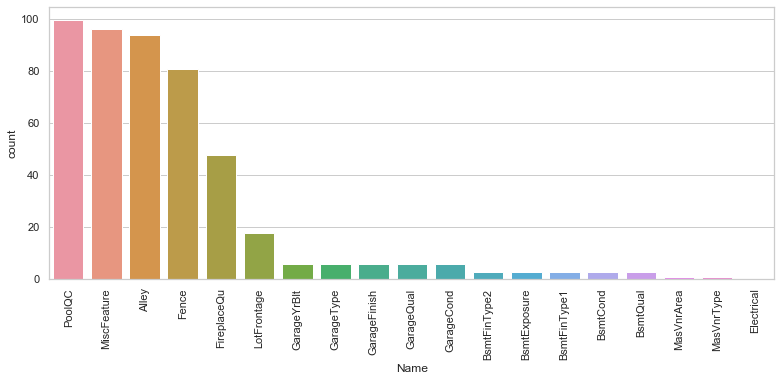

In [110]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [111]:
def removeMissingData(df):
    
    df["PoolQC"] = df["PoolQC"].fillna("None")
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    df["Alley"] = df["Alley"].fillna("None")
    df["Fence"] = df["Fence"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")  
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df = df.drop(['Utilities'], axis=1)
    df["Functional"] = df["Functional"].fillna("Typ")
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

removeMissingData(df)

In [112]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [113]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return(missing_data)

missing_data = findMissingData(df)
missing_data

,Missing Ratio


In [40]:
#  ========================================================================================================
#  =                                         FIXING SKEWNESS IN DATA                                      =
#  ========================================================================================================

In [ ]:
df


 mu = 12.02 and sigma = 0.40



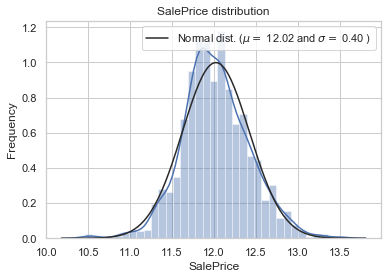

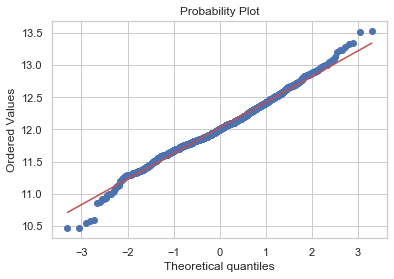

Skewness: 0.121347
Kurtosis: 0.809519


In [114]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_t["SalePrice"] = np.log1p(df_t["SalePrice"])

#Check the new distribution 
sns.distplot(df_t['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_t['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_t['SalePrice'], plot=plt)
plt.show()

y_train = df_t.SalePrice.values

print("Skewness: %f" % df_t['SalePrice'].skew())
print("Kurtosis: %f" % df_t['SalePrice'].kurt())

In [ ]:
#  ========================================================================================================
#  =                                              LINEAR ENCODING                                         =
#  ========================================================================================================


In [115]:
categorialCols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

In [116]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        print("Values After Transformation ",df[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)


Values before Transformation  ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['None' 'None' 'None' ... 'None' 'None' 'None']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 3 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'FR2' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 2 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'Gtl' 'Gtl']
Values After Transformation  [0 0 0 ... 0 0 0]
Values be

In [1]:
df.head()

NameError: name 'df' is not defined

In [118]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [119]:
#Take targate variable into y
y = df['SalePrice']

In [120]:
#Delete the saleprice
del df['SalePrice']

In [121]:
#Take their values in X and y
X = df.values
y = y.values

In [122]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=7)

In [123]:
X_test.shape

(1159, 79)

In [124]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Random Forest                              =
#  ========================================================================================================
def fileWriter(regressor,model,X_test):
    print("Actual Value","\t","Predicted Value","\t","Accuracy (%)")
    header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
    name = 'FinalPrediction_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        diffPercent = 100 - (abs((float(y_test[i]) - float(temp)) * 100) / float(y_test[i]))
        predicted_value = (str(y_test[i]) + "," + temp + "," + str(diffPercent))
        print(str(y_test[i]) + "\t" + "\t" + temp + "\t" + "\t" + str(diffPercent))
        f.write(predicted_value + '\n')
    f.close()


In [125]:
def sorterFunction(regressor):
    name = 'FinalPrediction_'+ regressor + '.csv'
    print(name)
    data = csv.reader(open(name),delimiter=',')
    sortedlist = sorted(reader, key=lambda row: row[3], reverse=True)

In [ ]:
#  ========================================================================================================
#  =                                              Regression                                              =
#  ========================================================================================================

In [126]:
#  ==================================       LINEAR REGRESSION      ============================================
model_linear = linear_model.LinearRegression()


#  ==================================      RANDOM FOREST           ============================================
model_randomForest = RandomForestRegressor(n_estimators=1000)


#  ==================================      GRADIENT BOODST         ============================================
model_GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)


#  ==================================      ELASTIC NET             ============================================
model_eNET = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)


In [ ]:
#  ========================================================================================================
#  =                                        FITTING THE MODEL                                             =
#  ========================================================================================================

In [127]:
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [128]:
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
model_eNET.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35920255403.45006, tolerance: 169371529.28371695
  positive)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#  ========================================================================================================
#  =                                     PREDICTING THE VALUE                                             =
#  ========================================================================================================

In [131]:
print("=================================       LINEAR REGRESSION      ============================================")
temp = str(model_linear.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))
      
print("=================================      FOREST FOREST           ============================================")
temp = str(model_randomForest.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      GRADIENT BOODST         ============================================")
temp = str(model_GBR.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      ELASTIC NET             ============================================")
temp = str(model_eNET.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

=================================       LINEAR REGRESSION      ============================================
Predict value 181924.33587083
Real value 173500
=================================      FOREST FOREST           ============================================
Predict value 179104.883
Real value 173500
=================================      GRADIENT BOODST         ============================================
Predict value 179420.37013305
Real value 173500
=================================      ELASTIC NET             ============================================
Predict value 181924.80000032
Real value 173500


In [ ]:
#  ========================================================================================================
#  =                                           MODEL ACCURACY                                            =
#  ========================================================================================================

In [132]:
print("=================================      LINEAR REGRESSION       ============================================")
print("Score --> ", model_linear.score(X, y)*100)
      
print("=================================      FOREST FOREST           ============================================")
print("Score --> ", model_randomForest.score(X_test, y_test)*100)

print("=================================      GRADIENT BOODST         ============================================")
print("Score --> ", model_GBR.score(X_test, y_test)*100)

print("=================================      ELASTIC NET             ============================================")
print("Score --> ", model_eNET.score(X_test, y_test)*100)


=================================      LINEAR REGRESSION       ============================================
Score -->  87.29715740522293
=================================      FOREST FOREST           ============================================
Score -->  85.04919038701215
=================================      GRADIENT BOODST         ============================================
Score -->  86.0108586074493
=================================      ELASTIC NET             ============================================
Score -->  85.47030616174095


In [61]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Linear Regression                              =
#  ========================================================================================================

fileWriter("LinearRegression",model_linear,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175239.40175119		98.70554812069943
150900		174998.09384126		84.03042157636845
173500		169324.35668216		97.59328915398271
246578		227938.88507844		92.44088486338603
227680		247906.58958006		91.11622031796381
214000		190120.38762687		88.8413026293785
154000		218934.14153779		57.834973027409085
95000		79114.94897033		83.27889365297895
64500		70014.67745611		91.45011247114728
171000		161300.48800465		94.32777076295321
153900		104693.29384629		68.02683160902535
185000		170517.26365526		92.17149386770811
318061		303052.45543029		95.28123706782347
122000		119467.25874658		97.92398257916393
159000		214087.81870181		65.35357314351572
167900		189286.31658368		87.26246778815963
139000		138733.1608968		99.80802942215827
160000		87546.05870959		54.71628669349375
277000		329428.17116701		81.07286239458124
145500		137277.05951856		94.34849451447424
173000		166767.03360389		96.39712925080347
145000		160068.33858777		89.60804235326206
239000		224600

133000		82403.46855035		61.9574951506391
140000		111996.05774712		79.99718410508571
109900		55414.13451886		50.42232440296633
110000		89393.15151525		81.2665013775
133000		178868.78472717		65.51219193445866
134800		109421.27480147		81.1730525233457
126000		135508.97338427		92.45319572676983
156000		141990.05889641		91.01926852333973
192000		228921.92178164		80.76983240539583
145000		126430.63513966		87.19354147562758
262500		262108.8841617		99.85100349017142
140000		119003.03516854		85.00216797752857
129900		150940.73405703		83.80236023323326
137500		195782.30112698		57.61287190765092
160000		158048.22188551		98.78013867844375
437154		443537.23332538		98.53982044648339
111250		114576.8455361		97.00957704620225
255000		256403.29281343		99.44968909277256
100000		89314.07605691		89.31407605691
85500		132560.8007881		44.958127733216386
290000		305020.30471841		94.82058457985862
119500		161678.20402882		64.70443177504602
160000		125672.58797033		78.54536748145625
394617		399626.65981017		98

128000		129854.36279316		98.55127906784375
200624		215292.25031821		92.68868614013778
164500		184402.09401999		87.90146260182978
374000		360211.71262814		96.3132921465615
202900		218092.05952593		92.51253842980286
102776		103723.95825303		99.07764628606874
402000		364992.15025032		90.79406722644775
141000		157593.62881091		88.23146892843262
93000		67401.84723287		72.47510455147312
108500		90681.50360643		83.57742267873732
207500		228586.01045739		89.8380672494506
137000		131807.55648265		96.2098952428102
165000		133069.91773517		80.64843499101212
107500		116931.0012783		91.22697555506977
127000		121572.97916008		95.72675524415747
104000		48498.64263931		46.633310230105764
222500		238930.19670266		92.61564193138877
248900		280468.09819279		87.3169553263198
115000		31571.11480677		27.45314331023478
236000		243923.89776465		96.6424162014195
147000		141021.8692703		95.93324440156462
254900		213490.33160246		83.75454358668497
260000		296188.02009677		86.08153073201153
207500		203476.3487915

266000		290999.37050208		90.60174041275188
224000		234832.04356448		95.16426626585714
223500		208870.19635739		93.45422655811633
192500		195312.81731827		98.5387961983013
143000		164527.56929628		84.94575573686713
282922		246416.87210917		87.09710524779622
135750		119194.15885695		87.80416858707183
283463		289880.13169587		97.7361660266525
143750		149152.51930878		96.24172569824
285000		344044.84825738		79.28250938337544
123000		130249.56164835		94.10604744036586
177000		194145.96425411		90.31301454570057
556581		413123.44394594		74.22521500840668
181900		153474.85105095		84.37320013796042
194000		232773.33395406		80.01374538450514
178000		182718.16091616		97.3493477999101
192000		186328.69002815		97.0461927229948
294000		259031.74230097		88.10603479624831
230000		174364.17604263		75.8105113228826
167500		236999.08248279		58.50801045803582
140000		148420.40906345		93.98542209753572
122900		88236.1685917		71.7950924261188
160000		159883.28605664		99.9270537854
187500		234389.40659091		7

In [62]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Random Forest                              =
#  ========================================================================================================

fileWriter("RandomForest",model_randomForest,X_test)

Actual Value 	 Predicted Value 	 Accuracy (%)
173000		189809.912		90.28328786127167
150900		169266.88		87.8284426772697
173500		168631.649		97.1940340057637
246578		215398.87		87.35526689323459
227680		212664.357		93.40493543569922
214000		215782.817		99.16690794392522
154000		183194.221		81.04271363636364
95000		144374.672		48.02666105263159
64500		104508.972		37.97058604651164
171000		159720.665		93.40389766081871
153900		150410.865		97.73285575048732
185000		166843.723		90.18579621621622
318061		305933.891		96.18717510163145
122000		209400.649		28.360123770491796
159000		174103.977		90.50064339622641
167900		166718.014		99.29601786777843
139000		136147.396		97.94776690647483
160000		135354.574		84.59660875
277000		226532.045		81.78052166064982
145500		139796.616		96.08014845360826
173000		163156.615		94.31018208092485
145000		159980.146		89.6688648275862
239000		263165.915		89.88873849372385
134432		153571.347		85.76280424303737
175000		155234.958		88.7056902857143
180000		161950.37

132500		139550.594		94.67879698113207
136500		135575.6		99.32278388278388
160000		150635.126		94.14695375
143000		154835.167		91.72365944055944
119000		139780.048		82.53777478991596
208900		183722.777		87.94771517472475
201000		224147.344		88.48390845771144
87000		102775.993		81.86667471264367
274300		248999.215		90.77623587313161
169000		182003.987		92.30533313609467
290000		275948.794		95.15475655172413
271000		276039.304		98.14047822878229
466500		398053.832		85.32772390139336
124500		137614.903		89.46594136546186
98000		117609.066		79.99074897959183
250000		282159.518		87.1361928
128500		134288.716		95.4951626459144
158000		160576.621		98.36922721518987
140000		139926.435		99.94745357142857
218000		170806.662		78.35167981651377
91300		99573.511		90.93810405257393
143500		139410.274		97.15001672473868
189000		208273.233		89.80252222222222
286000		259232.168		90.64061818181818
145250		147592.9		98.38698795180723
167900		165319.287		98.46294639666469
127000		136749.636		92.32312125984

225000		249321.228		89.19056533333332
194000		211634.096		90.91025979381443
93500		99167.345		93.93866844919786
271000		254424.145		93.8834483394834
169500		154596.643		91.20745899705015
179665		174020.215		96.85816102190186
164990		195505.687		81.50452330444269
124900		144914.991		83.97518734987989
402861		379996.899		94.32456827541013
200141		203913.975		98.11484153671661
173000		182188.303		94.68884219653178
145000		119768.045		82.59865172413794
386250		380581.601		98.53245333333334
122000		116639.2		95.60590163934427
80500		91084.784		86.8512
134000		149528.111		88.41185746268656
178000		176268.305		99.02713764044944
281000		274424.266		97.65988113879004
167000		147491.788		88.31843592814371
133000		127196.41		95.6363984962406
140000		149319.824		93.34298285714286
109900		112402.762		97.7226915377616
110000		112794.682		97.45938
133000		154309.053		83.97815563909774
134800		127278.038		94.41990949554896
126000		131203.672		95.87010158730159
156000		142071.498		91.07147307692307
192

93000		108601.624		83.22406021505377
108500		105090.086		96.85722211981566
207500		171281.225		82.5451686746988
137000		159075.152		83.8867503649635
165000		153462.5		93.00757575757575
107500		150264.203		60.21934604651162
127000		130416.744		97.30965039370078
104000		171640.604		34.9609576923077
222500		236548.59		93.68602696629213
248900		266788.012		92.81317316191242
115000		145616.189		73.37722695652172
236000		240757.087		97.98428516949153
147000		136060.672		92.55828027210885
254900		235247.347		92.29005374656728
260000		264559.761		98.24624576923077
207500		187490.809		90.35701638554217
200000		237530.831		81.2345845
129900		121501.154		93.53437567359506
81000		110524.462		63.550046913580246
172500		160356.042		92.96002434782608
179540		186033.367		96.3833312910772
188500		176321.994		93.53951936339523
280000		238236.108		85.08432428571429
158500		142278.17		89.7654069400631
256000		190642.52		74.469734375
210000		168926.405		80.44114523809523
129000		220292.514		29.230609302325

185000		179000.947		96.75726864864865
105000		123453.503		82.42523523809524
200000		205613.236		97.193382
125000		133311.051		93.3511592
80000		94336.107		82.07986625
187100		207595.289		89.04581026189204
348000		312479.688		89.79301379310346
100000		115367.58		84.63242
110000		138188.43		74.37415454545456
163990		170999.137		95.72587535825356
105000		123429.262		82.44832190476191
117500		176946.281		49.407420425531924
194500		188054.478		96.68610694087404
266000		292148.3		90.16981203007519
224000		201958.056		90.15984642857143
223500		211797.64		94.76404474272931
192500		202548.184		94.78016415584415
143000		155262.046		91.42514265734266
282922		250460.677		88.52640551105958
135750		116236.456		85.62538195211786
283463		276126.448		97.4118131819673
143750		135829.289		94.48994017391304
285000		311525.169		90.69292315789474
123000		124125.894		99.08463902439024
177000		169184.729		95.58459265536723
556581		388388.292		69.7810906229282
181900		165727.241		91.10898350742167
194000		1969

140000		136228.838		97.30631285714284
213000		188982.982		88.72440469483567
239000		288250.581		79.39306234309623
114504		131971.743		84.74486218822051
140200		149647.318		93.26154208273894
144000		189752.269		68.22759097222222
167000		167667.715		99.60017065868264
159000		160874.725		98.82092767295597
501837		433543.215		86.39124157844081
137500		142709.225		96.21147272727272
82000		99065.809		79.18803780487806
157000		148111.59		94.3385923566879
184100		174869.936		94.9863856599674
127500		119297.129		93.56637568627451
124900		119819.66		95.93247397918336
129000		126358.716		97.95249302325581
143000		127703.952		89.30346293706295
128000		151758.632		81.43856874999999
275000		267899.092		97.41785163636364
235000		244315.938		96.03577106382978
135000		131989.783		97.77020962962963
155000		140213.951		90.4606135483871
139000		135508.016		97.48778129496404
79900		128019.774		39.775001251564454
203000		208382.066		97.34873596059114
110000		118950.532		91.86315272727272
185850		201754.82		

In [63]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Gradient Boost                                 =
#  ========================================================================================================

fileWriter("GragientBoostRegression",model_GBR,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		193145.2126764		88.35536839514451
150900		171343.80665317		86.45208306615639
173500		161951.40946341		93.3437518521095
246578		224574.62681734		91.0765059402461
227680		213844.72820994		93.9233697338106
214000		213828.52208589		99.91987013359346
154000		185870.8403983		79.304649092013
95000		132120.64086838		60.925641191178954
64500		104993.65275982		37.219143008031004
171000		160514.68777059		93.86823846233334
153900		166138.02162395		92.04806912024043
185000		174919.31996802		94.5509837664973
318061		316851.37190597		99.61968676007746
122000		188851.41479448		45.203758365180335
159000		174436.32646335		90.29161857650944
167900		171068.27703438		98.11299759715307
139000		148336.1394546		93.28335291035971
160000		131085.31763127		81.92832351954375
277000		252242.8525506		91.06240164281587
145500		140995.83202951		96.90435191031615
173000		164907.57669427		95.3222986672081
145000		155970.7123779		92.43399146351724
239000		260693.5968

188000		144803.17811032		77.02296707995745
199900		233433.84681993		83.22468893450224
190000		170456.04109151		89.71370583763685
381000		367753.99702415		96.52335879898949
136000		143886.48723437		94.20111232766912
181000		185682.18472007		97.41315761322099
185000		173502.81538338		93.78530561263783
226000		222063.10276497		98.25801007299557
361919		357788.27798251		98.85866118731262
187000		179920.77566255		96.214318536123
207500		188309.03702483		90.75134314449639
132500		129412.1833479		97.66957233803774
190000		200596.36836299		94.42296401947894
165000		166567.90271454		99.04975593058182
227000		196946.81670256		86.76071220377092
214500		183476.3711999		85.53676979016316
176432		175282.52319807		99.3484873481398
226000		202489.13735289		89.59696343048229
106250		106195.14341086		99.9483702690447
67000		94425.31416135		59.066695281567156
172500		156633.36941878		90.80195328624927
263000		240991.31559903		91.6316789349924
212000		208739.18496421		98.46187970009906
131000		135742.6384

60000		110733.1640567		15.444726572166658
190000		159474.08255798		83.93372766209474
182900		176410.03285477		96.45163086646801
105000		112411.6470529		92.94128852104761
287000		226944.95554099		79.07489740104181
250000		224130.77125672		89.652308502688
135000		139576.64415197		96.60989322076297
451950		434431.00139496		96.12368655713242
260000		293411.3214458		87.14949175161539
106500		98337.20438181		92.33540317540846
171750		193725.34674375		87.2050382860262
195000		201368.59355713		96.73405458608718
220000		208752.08310408		94.88731050185454
188000		201672.08722154		92.72761318003192
153500		129185.1889269		84.15973219993485
316600		327741.23791735		96.48097349420404
260400		222054.66966916		85.27445071780338
110000		118977.36059807		91.83876309266364
302000		280896.49258769		93.01208363830796
75500		88370.80253498		82.95257942386755
225000		160701.61139215		71.42293839651111
101000		94144.15977698		93.21203938314851
159895		193491.52653363		78.98838204219643
272000		278462.5714829

86000		89202.85875577		96.27574563282559
193500		197302.87555261		98.03468963689406
159500		145194.65441497		91.03113129465203
124500		126600.22143945		98.31307514903614
194700		175041.40636214		89.90313629283
200000		172576.23532663		86.288117663315
150500		147159.47097917		97.78037938815282
333168		340170.82089791		97.89811119377912
110000		130735.64541988		81.14941325465455
115000		113698.95247227		98.86865432371305
263435		221942.14358113		84.24930004787898
394432		365879.62891677		92.76114233043211
137000		127241.53618657		92.87703371282481
103600		118524.09893631		85.59449909622587
107000		119072.49725864		88.71729228164486
115000		111030.21779158		96.54801547093913
116000		117233.27541012		98.936831543
194000		186996.54473726		96.38997151405155
239900		215319.90945758		89.75402645167986
311500		204877.25270733		65.77118867008988
113000		143789.07178236		72.75303382092036
176485		206659.63296999		82.90243761793354
103000		105892.31866437		97.19192362682524
192000		199659.06168847

In [64]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Elastic NET                                =
#  ========================================================================================================

fileWriter("ElasticNetRegression",model_eNET,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175408.81084406		98.60762378956069
150900		175250.28094662		83.86329957149104
173500		169278.355662		97.56677559769452
246578		227892.41595459		92.42203925516063
227680		247980.38562053		91.08380814277496
214000		190108.96174472		88.83596343211215
154000		218988.74342613		57.79951725575974
95000		79528.98980063		83.71472610592633
64500		70387.61834239		90.87190954668218
171000		161253.31082876		94.30018177120468
153900		104684.28041178		68.02097492643274
185000		169673.22833182		91.71525855774054
318061		303033.90535743		95.27540483034072
122000		119040.98542853		97.57457822010656
159000		214048.10062802		65.37855306413836
167900		189157.39739995		87.33925110187613
139000		138691.85242982		99.77831110058992
160000		87678.10736032		54.798817100200004
277000		328926.92479817		81.25381776239351
145500		137300.03609874		94.36428597851547
173000		166741.27474425		96.38223973656069
145000		159894.65297205		89.72782553651723
239000		224522

290000		301026.76593841		96.19766691778965
187750		193058.08197928		97.17279255431158
157500		130208.73796365		82.67221458009524
148000		129310.70952824		87.3721010325946
181000		182534.93812601		99.15196788618232
153500		151828.6248113		98.91115622885992
135000		162413.15788921		79.6939571191037
109500		112609.52754985		97.16024881292238
124500		151507.38889846		78.3073181538474
86000		64773.30128021		75.31779218629069
403000		338958.28079377		84.10875453939701
222500		219769.03631169		98.77260058952359
240000		281005.2292881		82.91448779662501
325624		368769.15015255		86.75000916623159
144000		127247.68731699		88.3664495256875
185000		176216.16419283		95.25198064477297
244000		399791.77501986		36.15091187710655
582933		410249.81789772		70.37683883014343
325000		338120.97217781		95.96277779144309
215000		223702.20024092		95.95246500422326
226000		228388.16947174		98.94328784436283
183500		197201.15730066		92.5334292639455
34900		83152.9409511		-38.260575791117475
73000		128356.6640108

110000		106746.33598596		97.0421236236
215000		244753.92929699		86.16096311767906
207500		226030.51012125		91.06963367650603
124000		149850.52576365		79.15280180350808
144000		148810.95724797		96.65905746668751
144500		207612.38530159		56.32360878782699
230000		221695.64478725		96.38941077706522
153337		204101.96917838		66.89320308967828
171000		225457.81502159		68.15332454877777
235000		325401.08558883		61.5314529409234
137000		128246.62683772		93.61067652388321
126000		109962.74513287		87.27201994672222
123000		121754.63759559		98.98751024031708
139000		85689.11380825		61.64684446636691
158000		206411.15859613		69.36002620498101
129000		131196.46551232		98.2973135563411
154500		159939.17736185		96.47949685317153
52000		53884.0841476		96.37676125461539
86000		112413.3820732		69.28676503116279
193500		234003.37431821		79.0680236081602
159500		124910.77172776		78.31396346568025
124500		129590.78018561		95.91101993123695
194700		212232.4936112		90.99512397986645
200000		205791.76971738		

In [ ]:

'''
print("Actual Value","\t","Predicted Value","\t","Accuracy (%)")
header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
f = open('FinalPrediction_ElasticNetRegression.csv','w')
f.write(header + '\n')
for i in range(len(X_test)):
    temp = str(model_eNET.predict([X_test[i]]))
    temp = temp.replace("[","") 
    temp = temp.replace("]","") 
    diffPercent = 100 - (abs((float(y_test[i]) - float(temp)) * 100) / float(y_test[i]))
    predicted_value = (str(y_test[i]) + "," + temp + "," + str(diffPercent))
    print(str(y_test[i]) + "\t" + "\t" + temp + "\t" + "\t" + str(diffPercent))
    f.write(predicted_value + '\n')
f.close()
'''

In [72]:
df.to_csv("dft.csv")

In [ ]:
#  ========================================================================================================
#  =                                             Using the Test Data                                      =
#  ========================================================================================================

In [65]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_test = df_test.drop(['Id'], axis=1)

In [66]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df_test[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df_test[c].values)) 
        df_test[c] = lbl.transform(list(df_test[c].values))
        print("Values After Transformation ",df_test[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)

Values before Transformation  ['RH' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [2 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  [nan nan nan ... nan nan nan]
Values After Transformation  [2 2 2 ... 2 2 2]
Values before Transformation  ['Reg' 'IR1' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 0 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'Corner' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 0 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'Gtl' 'Mod']
Values After Transformation  [0 0 0 ... 0 0 1]
Values before Transforma

In [67]:
TEST_DATA = df_test.values

In [68]:
TEST_DATA

array([[1.461e+03, 2.000e+01, 2.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.462e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.463e+03, 6.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       ...,
       [2.917e+03, 2.000e+01, 3.000e+00, ..., 2.006e+03, 8.000e+00,
        0.000e+00],
       [2.918e+03, 8.500e+01, 3.000e+00, ..., 2.006e+03, 8.000e+00,
        4.000e+00],
       [2.919e+03, 6.000e+01, 3.000e+00, ..., 2.006e+03, 8.000e+00,
        4.000e+00]])

In [69]:
type(TEST_DATA)

numpy.ndarray

In [70]:
TEST_DATA.shape

(1459, 80)

In [ ]:
print("Predicted Value")
header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
f = open('FinalPrediction_FINAL.csv','w')
f.write(header + '\n')
for i in range(len(TEST_DATA)):
    temp = str(model_GBR.predict([TEST_DATA[i]]))
    temp = temp.replace("[","") 
    temp = temp.replace("]","") 
    predicted_value = temp
    print([TEST_DATA[i]])
    print(temp)
    f.write(predicted_value + '\n')
f.close()